# prenoms - cgr v231801.1
## analyseur de prénoms base INSEE

### Helper functions

In [1]:
# mobile average of value dictionary d in x with window size w
def ma(d,x,w): return(np.average([d[i] for i in range(x-w,x+w) if i in d]))

#### Importation des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
prenoms=pd.read_csv('nat2021.csv',delimiter=';').groupby('preusuel').agg(list)
prenoms

,sexe,annais,nombre
preusuel,,,
A,"[1, 1, 1]","[1980, 1998, XXXX]","[3, 3, 21]"
AADAM,"[1, 1, 1, 1, 1, 1, 1, 1]","[2009, 2014, 2015, 2016, 2017, 2018, 2020, XXXX]","[4, 3, 3, 4, 4, 3, 3, 8]"
AADEL,"[1, 1, 1, 1, 1, 1, 1, 1]","[1976, 1978, 1980, 1981, 1982, 1983, 1987, XXXX]","[5, 3, 3, 5, 4, 3, 5, 29]"
AADHIRA,"[2, 2, 2]","[2020, 2021, XXXX]","[8, 6, 8]"
AADIL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1974, 1976, 1977, 1978, 1979, 1980, 1981, 198...","[4, 6, 6, 6, 9, 9, 9, 11, 12, 9, 8, 3, 8, 3, 7..."
...,...,...,...
ÖZGE,"[2, 2, 2, 2]","[1995, 2010, 2014, XXXX]","[4, 3, 5, 19]"
ÖZGÜR,"[1, 1, 1]","[2014, 2016, XXXX]","[3, 3, 20]"
ÖZKAN,"[1, 1, 1, 1]","[2014, 2017, 2018, XXXX]","[3, 3, 3, 18]"


#### Fonctions d'analyse des tendances annuelles

In [3]:
def maketrend(m):
    d={}
    for s,a,n in zip(m['sexe'],m['annais'],m['nombre']):
        aint=int(a) if a!='XXXX' else a
        if aint not in d: d[aint]={} 
        d[aint][s]=n
    return(d)
def trendprenom(p):
    # tendance d'un prénom i.e., dictionnaire annualisé des naissances
    d=maketrend(prenoms.loc[p])
    return({y:d[y] for y in d if y!='XXXX'})
def trendprenom_fm(prenom,sexe='F'):
    # tendance d'un prénom pour un sexe donné
    xs={'F':2,'M':1}
    tp=trendprenom(prenom)
    return({y:tp[y][xs[sexe]] for y in tp if xs[sexe] in tp[y]})
trendprenom('CAMILLE')

{1900: {1: 1200, 2: 737},
 1901: {1: 1276, 2: 675},
 1902: {1: 1309, 2: 729},
 1903: {1: 1292, 2: 739},
 1904: {1: 1433, 2: 740},
 1905: {1: 1444, 2: 790},
 1906: {1: 1418, 2: 743},
 1907: {1: 1453, 2: 760},
 1908: {1: 1513, 2: 779},
 1909: {1: 1515, 2: 763},
 1910: {1: 1594, 2: 728},
 1911: {1: 1413, 2: 699},
 1912: {1: 1493, 2: 692},
 1913: {1: 1422, 2: 632},
 1914: {1: 1431, 2: 735},
 1915: {1: 873, 2: 489},
 1916: {1: 744, 2: 348},
 1917: {1: 809, 2: 462},
 1918: {1: 906, 2: 464},
 1919: {1: 947, 2: 452},
 1920: {1: 1517, 2: 680},
 1921: {1: 1442, 2: 682},
 1922: {1: 1337, 2: 626},
 1923: {1: 1277, 2: 561},
 1924: {1: 1248, 2: 527},
 1925: {1: 1165, 2: 517},
 1926: {1: 1103, 2: 488},
 1927: {1: 1097, 2: 477},
 1928: {1: 1017, 2: 441},
 1929: {1: 1021, 2: 404},
 1930: {1: 924, 2: 411},
 1931: {1: 947, 2: 368},
 1932: {1: 822, 2: 349},
 1933: {1: 753, 2: 307},
 1934: {1: 749, 2: 264},
 1935: {1: 682, 2: 273},
 1936: {1: 579, 2: 215},
 1937: {1: 568, 2: 267},
 1938: {1: 522, 2: 204},


#### Fonctions de tracé des tendances

In [4]:
def plotepi(prenom):
    plt.figure(figsize=(1,2.5))
    d=trendprenom(prenom)
    dx={y:d[y][2]/sum(d[y].values()) for y in d if len(d[y])==2}
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.scatter(dx.keys(),dx.values(),s=.5,c='black')
    plt.yscale('log')
    plt.yticks([.1,1,10],['M x10','=','F x10'])
    plt.ylim([.1,10])
#plotepi('CAMILLE')

In [5]:
def plotprenom(prenom):
    plt.figure(figsize=(5,2.5))
    for sexe in ['F','M']:
        tpfm=trendprenom_fm(prenom.upper(),sexe)
        if sum(tpfm.values()): 
            plt.scatter(tpfm.keys(),tpfm.values(),c={'F':'blue','M':'gray'}[sexe],s=3,label=sexe)
    plt.title(prenom)
    plt.legend(loc='upper left')
#plotprenom('Camille')

In [238]:
print([x for x in prenoms.index if epicenity.get(x,0)>.9 and (x[0]=='A' and (x[1] not in ['A','B'] if len(x)>1 else True))])

['ACACIA', 'ACELIA', 'ACELYA', 'ACHATA', 'ACHIDA', 'ACHLEY', 'ACHOUAK', 'ACHTA', 'ACHWAK', 'ACIA', 'ACILE', 'ACYA', 'ADA', 'ADALGISA', 'ADALINA', 'ADALIND', 'ADALINE', 'ADALYNE', 'ADALYNN', 'ADASSA', 'ADAYA', 'ADDOLORATA', 'ADDYSON', 'ADEA', 'ADELA', 'ADELAIDA', 'ADELAIDE', 'ADELAIS', 'ADELAÏDE', 'ADELE', 'ADELEINE', 'ADELHEID', 'ADELIA', 'ADELICE', 'ADELIE', 'ADELINA', 'ADELINE', 'ADELISA', 'ADELISE', 'ADELLA', 'ADELLE', 'ADELMA', 'ADELPHINE', 'ADELYA', 'ADELYNE', 'ADELYS', 'ADEMA', 'ADENA', 'ADENISE', 'ADENORA', 'ADHIRA', 'ADIA', 'ADIARATOU', 'ADIBA', 'ADIDI', 'ADIDJA', 'ADIJA', 'ADILA', 'ADILIA', 'ADINA', 'ADINE', 'ADISA', 'ADISON', 'ADISSON', 'ADITI', 'ADIXIA', 'ADIZA', 'ADJA', 'ADJARA', 'ADJARATOU', 'ADJIA', 'ADJILA', 'ADJIRA', 'ADLINE', 'ADNA', 'ADOLIE', 'ADOLINE', 'ADOLPHA', 'ADOLPHINE', 'ADONIA', 'ADONIE', 'ADONISE', 'ADORA', 'ADORACION', 'ADORATION', 'ADRA', 'ADRIA', 'ADRIANA', 'ADRIANE', 'ADRIANNA', 'ADRIANNE', 'ADRIELLE', 'ADRIENNE', 'ADRINA', 'ADRYA', 'ADRYANA', 'ADVIKA', '

In [230]:
def epicenity_p(prenom):
    d=trendprenom(prenom)
    dx={y:d[y].get(2,0)/(d[y].get(1,0)+d[y].get(2,0)) for y in d}
    return(dx)
epicenity={prenom:np.average(list(epicenity_p(prenom).values())) for prenom in list(prenoms.index) if trendprenom(prenom)!={}}

In [235]:
epicenity['MARC']

0.001420187930685421

––– prénom ? Vesna


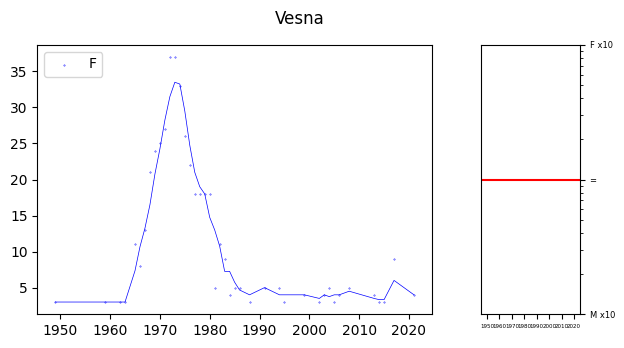

In [209]:
def plotprenomx(prenomx):
    prenom=prenomx.upper()
    if prenom not in prenoms.index:
        print('*** prénom inexistant')
        return(False)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(7,3.5),width_ratios=[4, 1],sharex=True)
    plt.suptitle(prenomx)
    for sexe in ['F','M']:
        tpfm=trendprenom_fm(prenom.upper(),sexe)
        if sum(tpfm.values()): 
            ax1.scatter([x for x in sorted(tpfm)],[tpfm[x] for x in sorted(tpfm)],c={'F':'blue','M':'gray'}[sexe],s=.1,label=sexe)
            #ax1.plot([x for x in sorted(tpfm)],[tpfm[x] for x in sorted(tpfm)],c={'F':'blue','M':'gray'}[sexe],linewidth=.25)
            ax1.plot([x for x in sorted(tpfm)],[ma(tpfm,x,2) for x in sorted(tpfm)],
                     c={'F':'blue','M':'gray'}[sexe],linewidth=.5)
    ax1.legend(loc='upper left')
    d=trendprenom(prenom)
    dx={y:d[y][2]/d[y][1] for y in d if len(d[y])==2}
    ax2.axhline(y = 1, color = 'r', linestyle = '-')
    ax2.plot([x for x in sorted(dx)],[dx[x] for x in sorted(dx)],linewidth=.25,c='black')
    ax2.scatter([x for x in sorted(dx)],[dx[x] for x in sorted(dx)],s=.3,c='black')
    ax2.set_yscale('log')
    ax2.set_yticks([.1,1,10],['M x10','=','F x10'])
    ax2.yaxis.tick_right()
    ax2.set_ylim([.1,10])
    ax2.tick_params(axis='x', labelsize=4)
    ax2.tick_params(axis='y', labelsize=6)
    plt.show()
plotprenomx(input('––– prénom ? '));

----

----

----

## GARBAGE

In [178]:
def dnorm(d): 
    # returns a yearly dictionary associating a ratio F/M and a total number of births 
    # for a given first name raw birth number dictionary d
    return ({x:(d[x].get(2,0)/d[x].get(1,1),d[x].get(2,0)+d[x].get(1,0)) for x in sorted([y for y in d if y!='XXXX'])})
dnorm(trendprenom('CAMILLE'))

{1900: (0.6141666666666666, 1937),
 1901: (0.5289968652037618, 1951),
 1902: (0.5569136745607334, 2038),
 1903: (0.5719814241486069, 2031),
 1904: (0.5163991625959525, 2173),
 1905: (0.5470914127423823, 2234),
 1906: (0.5239774330042313, 2161),
 1907: (0.5230557467309016, 2213),
 1908: (0.5148711169861203, 2292),
 1909: (0.5036303630363036, 2278),
 1910: (0.45671267252195735, 2322),
 1911: (0.49469214437367304, 2112),
 1912: (0.463496316141996, 2185),
 1913: (0.4444444444444444, 2054),
 1914: (0.5136268343815513, 2166),
 1915: (0.5601374570446735, 1362),
 1916: (0.46774193548387094, 1092),
 1917: (0.5710754017305315, 1271),
 1918: (0.5121412803532008, 1370),
 1919: (0.47729672650475186, 1399),
 1920: (0.44825313117996046, 2197),
 1921: (0.47295423023578365, 2124),
 1922: (0.4682124158563949, 1963),
 1923: (0.43931088488645265, 1838),
 1924: (0.422275641025641, 1775),
 1925: (0.44377682403433477, 1682),
 1926: (0.44242973708068906, 1591),
 1927: (0.43482224247948953, 1574),
 1928: (0.43

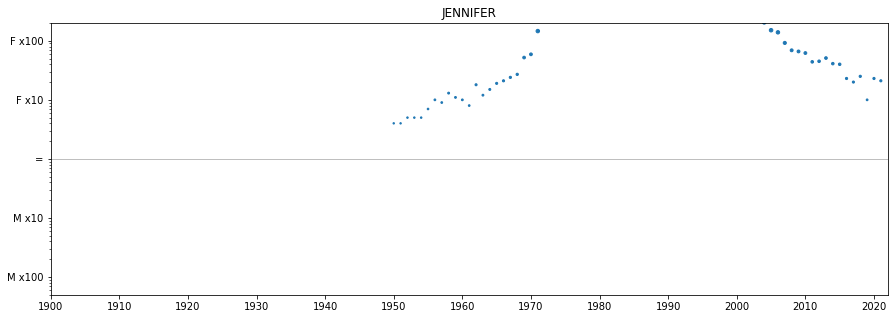

In [465]:
prenom='JENNIFER'
dp=dnorm(trendprenom(prenom))
plt.figure(figsize=(15,5))
plt.scatter([int(y) for y in dp],[dp[y][0] for y in dp],s=[np.sqrt(dp[y][1]) for y in dp])
#plt.plot([int(y) for y in dp],[dp[y][0] for y in dp])
plt.title(prenom)
plt.xticks(np.arange(1900, 2030, step=10),map(str,np.arange(1900, 2030, step=10)))
plt.yscale('log')
plt.xlim(1900,2022)
plt.ylim([.005,200])
plt.yticks([.01,.1,1,10,100],['M x100','M x10','=','F x10','F x100'])
plt.axline((1900,1),(2022,1),linewidth=.5,color='gray')
plt.show()

In [180]:
def epicenity(prenom): 
    # VERY POSITIVE IF VERY FEMALE, VERY NEGATIVE IF VERY MALE, OVER THE CENTURY
    d=dnorm(trendprenom(prenom))
    v=[(np.log(x[0]) if x[0] else 0) for x in d.values()]
    w=[x[0] for x in d.values()]
    return(np.average(v,weights=w) if sum(w) else 0)
epicenity('CAMILLE')

1.986016085146504

In [286]:
def pepicenity(prenom): 
    d=trendprenom(prenom)
    v=[d[y].get(2,0)/(d[y].get(2,0)+d[y].get(1,0)) for y in d]
    w=[sum(d[y].values()) for y in d]
    return(np.average(v,weights=w) if sum(w) else .5)
pepicenity('CAMILLE')

0.7237726967047747

In [287]:
def ftotalprenom(p):
    return(sum([sum(trendprenom(p)[y].values()) for y in trendprenom(p) if y !='XXXX']))
totalprenom={p:ftotalprenom(p) for p in prenoms.index}

In [293]:
tmp=[[p,totalprenom[p],pepicenity(p),1-2*np.abs(.5-pepicenity(p))] for p in prenoms.index if totalprenom[p]>100]
df=pd.DataFrame(tmp,columns=['prenom','#','pep','epep'])
df

,prenom,#,pep,epep
0,AADIL,153,0.0,0.0
1,AALIYA,232,1.0,0.0
2,AALIYAH,2935,1.0,0.0
3,AALYA,141,1.0,0.0
4,AALYAH,243,1.0,0.0
...,...,...,...,...
11569,ÉWEN,109,0.0,0.0
11570,ÉZIO,379,0.0,0.0
11571,ÉZÉCHIEL,292,0.0,0.0
11572,ÉZÉKIEL,176,0.0,0.0


In [303]:
print(list(df.sort_values(by='epep',ascending=False)['prenom'])[:300])

['ENOA', 'EDENN', 'HARLEY', 'NAHID', 'SHILO', 'CHARLIE', 'DESTINY', 'YAEL', 'KENDALL', 'ROSARIO', 'LOÉ', 'ILIA', 'YANNE', 'JAËL', 'ELIN', 'XUAN', 'MEDINE', '_PRENOMS_RARES', 'KANDE', 'CARMEL', 'SINA', 'FELICE', 'FAUSTE', 'MILANE', 'LIWEN', 'ADDA', 'GABY', 'MADY', 'LE', 'ELIAH', 'KELIANE', 'ROBYN', 'NAZAR', 'NAÉ', 'NEHEMIE', 'SHAMS', 'DOROTHE', 'JANICK', 'ANGY', 'IVANE', 'PHILOGONE', 'PARIS', 'ZAYANE', 'MAÏLEY', 'MYLANE', 'LOUISON', 'LOETARE', 'TAHIS', 'SORA', 'KELYANE', 'CHAMS', 'YAËL', 'ALA', 'YAKINE', 'HEAVEN', 'ANGE-MARIE', 'CHAN', 'NIMA', 'NICOMEDE', 'JANNICK', 'HAMIDE', 'NATHY', 'GWEN', 'ORPHÉE', 'AELIG', 'IHSEN', 'AZEL', 'KRISTEN', 'CHAHED', 'JOA', 'DARA', 'NATY', 'LORRY', 'AXELL', 'MAELIG', 'ORPHEE', 'KENSY', 'JANIK', 'MAË', 'MALI', 'SASHA', 'FATI', 'JANY', 'LENAICK', 'CAMERONE', 'ANAEL', 'GABRIELE', 'SYDNEY', 'KILLIANE', 'IZAYA', 'ANH', 'HONORAT', 'PRAISE', 'NOUHA', 'TENZIN', 'TAHÏS', 'SADIO', 'YAHEL', 'ACIL', 'THANH', 'ISA', 'ZIYA', 'LILO', 'DOMINIQUE', 'SWANNY', 'JANNY', 'DAL

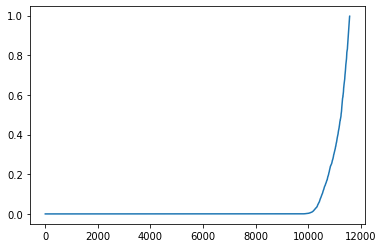

In [294]:
plt.plot(sorted(df['epep']))

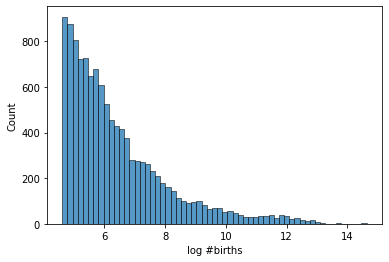

In [275]:
sb.histplot([np.log(x) for x in sorted(df['#'])])
plt.xlabel('log #births')
plt.show()

In [237]:
epic={p:epicenity(p) for p in prenoms.index if epicenity(p)!=0}
epic

{'AADHIRA': 1.956149224914787,
 'AALEYAH': 1.7681592225479748,
 'AALIA': 1.7759769597495743,
 'AALIYA': 2.5492993515494744,
 'AALIYAH': 5.056162512962521,
 'AALYA': 2.052848348569004,
 'AALYAH': 2.5152723269787027,
 'AANOR': 1.187129849422504,
 'AARICIA': 1.0986122886681098,
 'AARON': -3.343591462628495,
 'AATHIRA': 1.5070439327578633,
 'AAYA': 1.496525555700168,
 'ABASSIA': 1.3862943611198906,
 'ABBIE': 3.1237093356274865,
 'ABBIGAELLE': 1.0986122886681098,
 'ABBIGAËLLE': 1.2136851176488221,
 'ABBY': 4.972628036717753,
 'ABBY-GAELLE': 2.0815854222124632,
 'ABBY-GAËLLE': 2.3259468405617505,
 'ABBYGAEL': 2.09123326517655,
 'ABBYGAELLE': 3.0292580810687353,
 'ABBYGAIL': 1.9715464325628602,
 'ABBYGAËL': 2.4689608003781935,
 'ABBYGAËLLE': 3.5239698930471572,
 'ABBYGAÏL': 1.6649609139451957,
 'ABDON': -0.9581156249851451,
 'ABDONIE': 1.2136851176488221,
 'ABDONISE': 1.3862943611198906,
 'ABEER': 1.0986122886681098,
 'ABEL': -3.784330355351251,
 'ABELIA': 1.7488946013266928,
 'ABELINA': 1.09

In [238]:
{k: v for k, v in sorted(epic.items(), key=lambda item: np.abs(item[1]))}

{'QUINCY': 0.005549224491322337,
 'LAYAN': -0.006563082324214025,
 'TIMOTHÉE': 0.010201005261469854,
 'AWEN': -0.013628389756155579,
 'LEYAN': 0.014321375552336774,
 'ACYL': -0.01692247485010479,
 'DAMASE': 0.02018318526676463,
 'MAÏLAN': 0.022322268458134138,
 'OCULI': 0.02654623833152187,
 'ANONYME': 0.027530528637629073,
 'NONCE': 0.029980183808632804,
 'WISAM': 0.03158394240196326,
 'LEZIN': 0.032922819046358826,
 'YANNIK': 0.03596591354747536,
 'ISLEM': -0.04106191866125825,
 'SOK': 0.04109743892168297,
 'EUSTASE': 0.04856338352456012,
 'ELISEE': -0.048606107050271206,
 'NESTA': 0.05093513940512372,
 'CHARLIE': 0.05397903125210562,
 'CLOUD': 0.05442633803141799,
 'DILAN': 0.05448954410541258,
 'VALÉRY': -0.05523568387282941,
 'SAWYER': 0.061996017264863756,
 'IZEM': -0.0637553003754885,
 'DANY': -0.0642214704673305,
 'MAXENCE': 0.06765632911314504,
 'AÏSSA': -0.07396622158050573,
 'MAYLANN': -0.07482378651679208,
 'NOAH': 0.07642251680796149,
 'SAINTE-CROIX': -0.07802354883314715,